
Basic exploratory analysis

In [2]:
import numpy as np
import pandas as pd

In [3]:
# load data file and convert to a pandas dataframe

airfare_df = pd.read_csv('Airfares_unprocessed.csv')

In [4]:
# print first five rows

airfare_df.head(5)

,S_CODE,S_CITY,E_CODE,E_CITY,COUPON,NEW,VACATION,SW,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,*,Dallas/Fort Worth TX,*,Amarillo TX,1.00,3,No,Yes,28637.0,21112.0,3036732,205711.0,Free,Free,312,7864,64.11
1,*,Atlanta GA,*,Baltimore/Wash Intl MD,1.06,3,No,No,26993.0,29838.0,3532657,7145897.0,Free,Free,576,8820,174.47
2,*,Boston MA,*,Baltimore/Wash Intl MD,1.06,3,No,No,30124.0,29838.0,5787293,7145897.0,Free,Free,364,6452,207.76
3,ORD,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,29260.0,29838.0,7830332,7145897.0,Controlled,Free,612,25144,85.47
4,MDW,Chicago IL,*,Baltimore/Wash Intl MD,1.06,3,No,Yes,29260.0,29838.0,7830332,7145897.0,Free,Free,612,25144,85.47


In [5]:
# print data types of each column

airfare_df.dtypes

S_CODE       object
S_CITY       object
E_CODE       object
E_CITY       object
COUPON      float64
NEW           int64
VACATION     object
SW           object
S_INCOME    float64
E_INCOME    float64
S_POP         int64
E_POP       float64
SLOT         object
GATE         object
DISTANCE      int64
PAX           int64
FARE        float64
dtype: object

In [6]:
# print the length of the dataframe

print(len(airfare_df))

638


In [7]:
# check for null values

airfare_df.isnull().sum()

S_CODE      0
S_CITY      0
E_CODE      0
E_CITY      0
COUPON      0
NEW         0
VACATION    0
SW          0
S_INCOME    6
E_INCOME    2
S_POP       0
E_POP       5
SLOT        0
GATE        0
DISTANCE    0
PAX         0
FARE        0
dtype: int64

In [ ]:
# display all rows of dataframe

pd.set_option("display.max_rows", None)

In [8]:
# analyze "S_CITY"

airfare_df['S_CITY'].value_counts()

Chicago             IL    90
New York/Newark     NY    88
Atlanta             GA    41
Dallas/Fort Worth   TX    36
Los Angeles         CA    33
Boston              MA    31
Las Vegas           NV    26
Detroit             MI    22
Denver              CO    22
Houston             TX    20
Orlando             FL    15
Phoenix             AZ    15
Seattle/Tacoma      WA    12
Minneapolis/St Paul MN    12
Miami               FL    11
Fort Lauderdale     FL    11
Kansas City         MO    11
Cleveland           OH    10
Austin              TX    10
Columbus            OH    10
Albuquerque         NM     9
San Diego           CA     9
San Francisco       CA     8
Burbank             CA     7
New Orleans         LA     7
Oakland             CA     6
Philadelphia/Camden PA     6
Cincinnati          OH     6
Washington          DC     6
Hartford            CT     5
Fort Meyers         FL     4
St Louis            MO     4
Tampa               FL     4
Greenville/Sprtnbg  SC     3
Jacksonville  

In [9]:
# analyze "E_CITY"

airfare_df['E_CITY'].value_counts()

New York/Newark     NY    75
Washington          DC    54
Phoenix             AZ    25
Baltimore/Wash Intl MD    23
Orlando             FL    23
                          ..
Boston              MA     1
Memphis             TN     1
El Paso             TX     1
Cincinnati          OH     1
Amarillo            TX     1
Name: E_CITY, Length: 68, dtype: int64

In [10]:
# analyze "SW"

airfare_df['SW'].value_counts()

No     444
Yes    194
Name: SW, dtype: int64

## Part 2: Data visualization

In [11]:
import matplotlib.pyplot as plt

In [12]:
%matplotlib inline

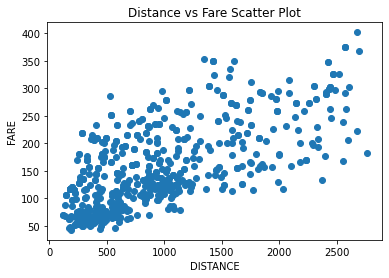

In [13]:
# plot DISTANCE vs. FARE (scatter plot)

plt.scatter(airfare_df['DISTANCE'],airfare_df['FARE'])
plt.title("Distance vs Fare Scatter Plot")
plt.xlabel("DISTANCE")
plt.ylabel("FARE")
plt.show()

# Interpretation:- As the distance increases, the fares increase. We can see the data scattered between the distance of 150-1000 miles.
# Most of the flights are booked which has a distance between 100-1000 miles.

Index(['No', 'Yes'], dtype='object')
[468 170]


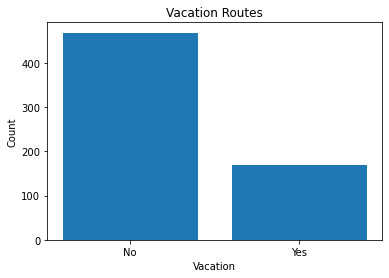

In [14]:
# plot the VACATION variable in a bar plot

counts = airfare_df['VACATION'].value_counts()
print(counts.index)
print(counts.values)

plt.bar(counts.index, counts.values)
plt.xlabel("Vacation")                                    
plt.ylabel("Count")              
plt.title("Vacation Routes")                                
plt.show()

## Part 3: Data preprocessing

### Part 3.1: Select predictors

In [14]:
# drop S_CODE

airfare_df=airfare_df.drop(columns=['S_CODE'])

In [15]:
# drop any other variables you see fit

airfare_df=airfare_df.drop(columns=['E_CODE'])

In [16]:
airfare_df.head()

,S_CITY,E_CITY,COUPON,NEW,VACATION,SW,S_INCOME,E_INCOME,S_POP,E_POP,SLOT,GATE,DISTANCE,PAX,FARE
0,Dallas/Fort Worth TX,Amarillo TX,1.00,3,No,Yes,28637.0,21112.0,3036732,205711.0,Free,Free,312,7864,64.11
1,Atlanta GA,Baltimore/Wash Intl MD,1.06,3,No,No,26993.0,29838.0,3532657,7145897.0,Free,Free,576,8820,174.47
2,Boston MA,Baltimore/Wash Intl MD,1.06,3,No,No,30124.0,29838.0,5787293,7145897.0,Free,Free,364,6452,207.76
3,Chicago IL,Baltimore/Wash Intl MD,1.06,3,No,Yes,29260.0,29838.0,7830332,7145897.0,Controlled,Free,612,25144,85.47
4,Chicago IL,Baltimore/Wash Intl MD,1.06,3,No,Yes,29260.0,29838.0,7830332,7145897.0,Free,Free,612,25144,85.47


### Part 3.2: Deal with NA values

In [17]:
# populate NA values in S_INCOME with the column mean

print(airfare_df["S_INCOME"].mean())
airfare_df = airfare_df.fillna(value = {"S_INCOME": airfare_df["S_INCOME"].mean()})

airfare_df.isnull().sum()

27761.528481012658


S_CITY      0
E_CITY      0
COUPON      0
NEW         0
VACATION    0
SW          0
S_INCOME    0
E_INCOME    2
S_POP       0
E_POP       5
SLOT        0
GATE        0
DISTANCE    0
PAX         0
FARE        0
dtype: int64

In [19]:
# drop all rows from the DataFrame in which E_INCOME and/or E_POP takes an NA value 
# hint, you can try: airfare_df = airfare_df.dropna(axis=0, subset = ["E_INCOME", "E_POP"])

airfare_df = airfare_df.dropna(axis=0, subset = ["E_INCOME", "E_POP"])

airfare_df.isnull().sum()

S_CITY      0
E_CITY      0
COUPON      0
NEW         0
VACATION    0
SW          0
S_INCOME    0
E_INCOME    0
S_POP       0
E_POP       0
SLOT        0
GATE        0
DISTANCE    0
PAX         0
FARE        0
dtype: int64

### Part 3.3: Deal with Categorical Variables

In [20]:
# create binary flag variables for each categorical variable (this can be done with one line of code)

airfare_df = pd.get_dummies(airfare_df)
airfare_df.head()

,COUPON,NEW,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,FARE,S_CITY_Albuquerque NM,...,E_CITY_Washington DC,E_CITY_West Palm Beach FL,VACATION_No,VACATION_Yes,SW_No,SW_Yes,SLOT_Controlled,SLOT_Free,GATE_Constrained,GATE_Free
0,1.00,3,28637.0,21112.0,3036732,205711.0,312,7864,64.11,0,...,0,0,1,0,0,1,0,1,0,1
1,1.06,3,26993.0,29838.0,3532657,7145897.0,576,8820,174.47,0,...,0,0,1,0,1,0,0,1,0,1
2,1.06,3,30124.0,29838.0,5787293,7145897.0,364,6452,207.76,0,...,0,0,1,0,1,0,0,1,0,1
3,1.06,3,29260.0,29838.0,7830332,7145897.0,612,25144,85.47,0,...,0,0,1,0,0,1,1,0,0,1
4,1.06,3,29260.0,29838.0,7830332,7145897.0,612,25144,85.47,0,...,0,0,1,0,0,1,0,1,0,1


### Part 3.4 Normlize data

In [21]:
from sklearn import preprocessing

In [22]:
# we can take the functionality from sklearn and save it under our own name to make things easier...

min_max_scaler = preprocessing.MinMaxScaler()

In [23]:
# extract column that we want to normalize, and make a DataFrame with just those columns

columns_to_normalize = ["S_INCOME","E_INCOME","S_POP","E_POP","DISTANCE","PAX","FARE"]
data_to_normalize = airfare_df[columns_to_normalize]
data_to_normalize.head()  # this print the first 5 rows of the new DataFrame

,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,FARE
0,28637.0,21112.0,3036732,205711.0,312,7864,64.11
1,26993.0,29838.0,3532657,7145897.0,576,8820,174.47
2,30124.0,29838.0,5787293,7145897.0,364,6452,207.76
3,29260.0,29838.0,7830332,7145897.0,612,25144,85.47
4,29260.0,29838.0,7830332,7145897.0,612,25144,85.47


In [24]:
# execute min-max normalization on the columns we extracted above

normalized_columns = min_max_scaler.fit_transform(data_to_normalize)
normalized_columns

array([[0.5797299 , 0.26894643, 0.33312815, ..., 0.07471698, 0.08785987,
        0.06018634],
       [0.51183249, 0.62933135, 0.38807076, ..., 0.17433962, 0.10106648,
        0.36712557],
       [0.64114319, 0.62933135, 0.63785765, ..., 0.09433962, 0.06835387,
        0.45971353],
       ...,
       [0.55317391, 0.94061042, 0.54491151, ..., 0.31924528, 0.06233077,
        0.22917536],
       [0.71783753, 0.94061042, 0.50075635, ..., 0.28075472, 0.04659612,
        0.24238632],
       [0.71783753, 0.94061042, 0.50075635, ..., 0.28075472, 0.04659612,
        0.24238632]])

In [25]:
# the output of the above cell was a NumPy array (a matrix); let convert it to a pandas DataFrame)

normalized_columns = pd.DataFrame(normalized_columns, columns = columns_to_normalize)
normalized_columns.head()

,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,FARE
0,0.579730,0.268946,0.333128,0.010506,0.074717,0.087860,0.060186
1,0.511832,0.629331,0.388071,0.786437,0.174340,0.101066,0.367126
2,0.641143,0.629331,0.637858,0.786437,0.094340,0.068354,0.459714
3,0.605460,0.629331,0.864202,0.786437,0.187925,0.326573,0.119594
4,0.605460,0.629331,0.864202,0.786437,0.187925,0.326573,0.119594


In [26]:
# create a DataFrame of the columns in our original dataset that were NOT normalized
# the first line of code below creates a new dataframe in which we drop all of the columns that were normalized,
# and thus, we have a dataframe containing all columns that were not normalized

non_normalized_columns = airfare_df.drop(columns_to_normalize, axis = 1)  
non_normalized_columns.head(10)

,COUPON,NEW,S_CITY_Albuquerque NM,S_CITY_Anchorage AK,S_CITY_Atlanta GA,S_CITY_Austin TX,S_CITY_Baltimore/Wash Intl MD,S_CITY_Boise ID,S_CITY_Boston MA,S_CITY_Burbank CA,...,E_CITY_Washington DC,E_CITY_West Palm Beach FL,VACATION_No,VACATION_Yes,SW_No,SW_Yes,SLOT_Controlled,SLOT_Free,GATE_Constrained,GATE_Free
0,1.00,3,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,1
1,1.06,3,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,1
2,1.06,3,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,1,0,1
3,1.06,3,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,1
4,1.06,3,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,1
5,1.01,3,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,1
11,1.50,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,1
12,1.12,3,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,1
13,1.29,3,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,1
14,1.00,3,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1


In [27]:
# reset the indices of the non_normalized_columns dataframe so that the first row is index 0, the second row is index 1, 
# and so on (the indices are likely not correct anymore given that we dropped some NA values earlier)

non_normalized_columns = non_normalized_columns.reset_index(drop=True)
non_normalized_columns.head(10)

,COUPON,NEW,S_CITY_Albuquerque NM,S_CITY_Anchorage AK,S_CITY_Atlanta GA,S_CITY_Austin TX,S_CITY_Baltimore/Wash Intl MD,S_CITY_Boise ID,S_CITY_Boston MA,S_CITY_Burbank CA,...,E_CITY_Washington DC,E_CITY_West Palm Beach FL,VACATION_No,VACATION_Yes,SW_No,SW_Yes,SLOT_Controlled,SLOT_Free,GATE_Constrained,GATE_Free
0,1.00,3,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,1
1,1.06,3,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,1
2,1.06,3,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,1,0,1
3,1.06,3,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,1
4,1.06,3,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,1
5,1.01,3,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,1
6,1.50,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,1
7,1.12,3,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,1
8,1.29,3,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,1
9,1.00,3,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,1


In [28]:
# combine the normalized_columns dataframe with the non_normalized_columns dataframe to get our entire dataset
# together again in one dataframe

airfare_final = pd.concat([normalized_columns, non_normalized_columns], axis = 1)  
airfare_final.head(15)

,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,FARE,COUPON,NEW,S_CITY_Albuquerque NM,...,E_CITY_Washington DC,E_CITY_West Palm Beach FL,VACATION_No,VACATION_Yes,SW_No,SW_Yes,SLOT_Controlled,SLOT_Free,GATE_Constrained,GATE_Free
0,0.579730,0.268946,0.333128,0.010506,0.074717,0.087860,0.060186,1.00,3,0,...,0,0,1,0,0,1,0,1,0,1
1,0.511832,0.629331,0.388071,0.786437,0.174340,0.101066,0.367126,1.06,3,0,...,0,0,1,0,1,0,0,1,0,1
2,0.641143,0.629331,0.637858,0.786437,0.094340,0.068354,0.459714,1.06,3,0,...,0,0,1,0,1,0,0,1,0,1
3,0.605460,0.629331,0.864202,0.786437,0.187925,0.326573,0.119594,1.06,3,0,...,0,0,1,0,0,1,1,0,0,1
4,0.605460,0.629331,0.864202,0.786437,0.187925,0.326573,0.119594,1.06,3,0,...,0,0,1,0,0,1,0,1,0,1
5,0.472721,0.629331,0.243858,0.786437,0.073585,0.164143,0.039744,1.01,3,0,...,0,0,1,0,0,1,0,1,0,1
6,0.417379,0.629331,1.000000,0.786437,0.835849,0.080745,0.518760,1.50,1,0,...,0,0,1,0,0,1,0,1,0,1
7,0.470615,0.629331,0.120228,0.786437,0.178491,0.057330,0.102072,1.12,3,0,...,0,0,1,0,0,1,0,1,0,1
8,0.307190,0.629331,0.141660,0.786437,0.331321,0.027919,0.249145,1.29,3,0,...,0,0,1,0,0,1,0,1,0,1
9,0.759551,0.629331,0.951812,0.786437,0.025283,0.078286,0.207927,1.00,3,0,...,0,0,1,0,1,0,1,0,0,1


In [29]:
airfare_final.describe()

,S_INCOME,E_INCOME,S_POP,E_POP,DISTANCE,PAX,FARE,COUPON,NEW,S_CITY_Albuquerque NM,...,E_CITY_Washington DC,E_CITY_West Palm Beach FL,VACATION_No,VACATION_Yes,SW_No,SW_Yes,SLOT_Controlled,SLOT_Free,GATE_Constrained,GATE_Free
count,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,...,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000
mean,0.544583,0.538125,0.504551,0.339237,0.324370,0.155839,0.329346,1.201284,2.752773,0.014263,...,0.085578,0.017433,0.735341,0.264659,0.698891,0.301109,0.285261,0.714739,0.194929,0.805071
std,0.148406,0.190929,0.334051,0.303043,0.244485,0.181933,0.212263,0.203579,0.763693,0.118667,...,0.279962,0.130981,0.441502,0.441502,0.459104,0.459104,0.451897,0.451897,0.396460,0.396460
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.417379,0.384215,0.202994,0.124892,0.126415,0.053593,0.176471,1.040000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.579730,0.487713,0.388071,0.232937,0.274717,0.086920,0.284050,1.150000,3.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,0.617396,0.717838,0.864202,0.496185,0.451698,0.175955,0.464136,1.290000,3.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.940000,3.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
